In [2]:
from text2features_paths import FEATURE_PIPELINE_RESOURCES
from utils import DATA_DIR
import pandas as pd
from text2features import FeatureExtractorPipeline

feature_extractor = FeatureExtractorPipeline(resources=FEATURE_PIPELINE_RESOURCES)

/home/terra/Projects/vis-desc/modules/lab/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-10-25 19:33:01.061334: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761413581.148873  773700 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761413581.173682  773700 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-25 19:33:01.367232: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in p

using device cpu


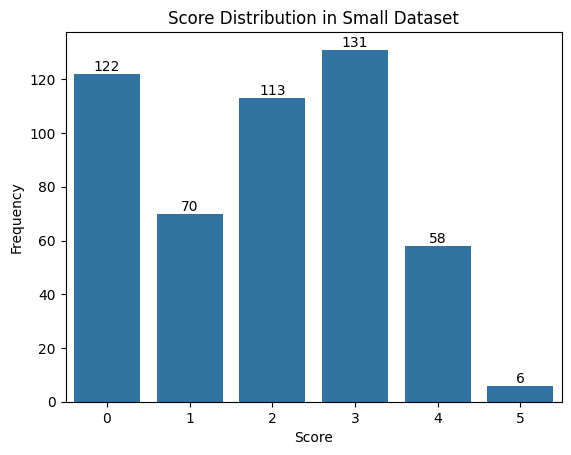

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

ds_small_labeled_path = DATA_DIR / "datasets" / "small" / "agreed.csv"
ds_small = pd.read_csv(ds_small_labeled_path, sep="\t", dtype={"label": int})

ds_small.drop(columns=["segment_id", "annotator_1", "annotator_2"], inplace=True)
ds_small.rename(columns={"agreed_rating": "label"}, inplace=True)

# Drop rows without label
ds_small = ds_small.dropna(subset=["label"])

# Plot label distribution
ax = sns.countplot(x="label", data=ds_small)
ax.bar_label(ax.containers[0])
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Score Distribution in Small Dataset")
plt.show()


In [4]:
# Add column for feature vectors
ds_small["features"] = [feature_extractor.extract(text) for text in ds_small["text"]]

ds_small.to_parquet(DATA_DIR / "datasets" / "small" / "agreed.parquet", index=False)